#**Hello Everyone 👋**#
  # **Hope you all are doing great. This is Dev on this end, and I welcome you all in this session. Let's wait for few minutes, so that your peers can also join. We will be kicking off the session at 7:07 AM**

#**Background / Scenario**#


**US Honey Case Study**

**PREFACE**

  **In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component of American honey agriculture. Large numbers of hives were lost to `Colony Collapse Disorder`, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America from 1998 to 2021.**


#**OBJECTIVE**#

****Visualize how the honey production is changed over the year (1998 - 2021) in US****

#**QUESTION**#

**How has honey production yield changed from 1998 to 2016?**

**Over time, what are the major production trends been across the states?**

**Are there any patterns that can be observed between total honey production and value of production every year?**

**How has value of production, which in some sense could be tied to demand, changed every year?**

<hr>

# **Step 1 - Requirement Phase**
  * **What do we need in the project>**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<hr>

# **Step 2 - Data Loading and Inspection Phase**

**Data Loading**

In [ ]:
df = pd.read_csv("/content/US_honey_dataset.csv")

**Data Inspection**

In [ ]:
# First view perspective ->
df.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


**Insights / Inference / Reference Points**
  * **The column Unname: 0, it's not important to us**

In [ ]:
df.tail()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
1110,1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021
1114,1114,Wyoming,38000,58,242000,242000,2.07,4562000,2021


<hr>

**Shape Inspection**

In [ ]:
a = df.shape
print(f"Rows: {a[0]} and Columns: {a[1]}")

Rows: 1115 and Columns: 9


<hr>

**Brief on the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1115 non-null   int64  
 1   state                1115 non-null   object 
 2   colonies_number      1115 non-null   int64  
 3   yield_per_colony     1115 non-null   int64  
 4   production           1115 non-null   int64  
 5   stocks               1115 non-null   int64  
 6   average_price        1115 non-null   float64
 7   value_of_production  1115 non-null   int64  
 8   year                 1115 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 78.5+ KB


* **The unnamed column can dropped, as there is no need to the columns**
* **Most of my data is numerical nature**
* **The year columns needs to be worked on for conversion of dtype into object or date**

In [ ]:
# Dropping the unnname column
df = df.drop("Unnamed: 0", axis = 1)

<hr>

# **Step 3 - Data Preprocessing**

**Null Values**

In [ ]:
df.isnull().sum()

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

**Duplicates**

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1110    False
1111    False
1112    False
1113    False
1114    False
Length: 1115, dtype: bool

<hr>

# **Step 4 - Exploratory Data Analysis (EDA) / Deep Analysis**

<hr>

* **How many states were involved in this business?**

In [ ]:
df["state"].unique() # return array of the elements

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'NewJersey', 'NewMexico', 'NewYork',
       'NorthCarolina', 'NorthDakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'SouthCarolina', 'SouthDakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'WestVirginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [ ]:
df["state"].nunique() #->

44

<hr>

**What is the tenure of the data that we are look on?**

In [ ]:
df["year"].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021])

In [ ]:
df["year"].max() - df["year"].min()

26

**Which were the states that were having the highest production**

In [ ]:
df.groupby("state")["production"].sum().sort_values(ascending = False)

state
NorthDakota      513742000
California       423876000
SouthDakota      355726000
Florida          280934000
Montana          197173000
Minnesota        176581000
Texas            129441000
Michigan         101063000
Wisconsin         99909000
Idaho             87188000
NewYork           78444000
Nebraska          63655000
Louisiana         60568000
Georgia           57426000
Washington        53238000
Arkansas          51846000
Iowa              48607000
Wyoming           43921000
Oregon            43789000
Arizona           38844000
Colorado          32660000
Ohio              22485000
Pennsylvania      21370000
Mississippi       21235000
Utah              20369000
Missouri          17904000
Hawaii            15420000
Alabama           14467000
Kansas            14138000
NewMexico         10082000
Illinois           9864000
Indiana            9686000
NorthCarolina      8909000
Nevada             7399000
Vermont            7032000
NewJersey          6913000
Tennessee          685

**The climate in the top production state would have been very adequate for honey production, that is the reason why the production are very high (Assumption)**

Graphical Analysis

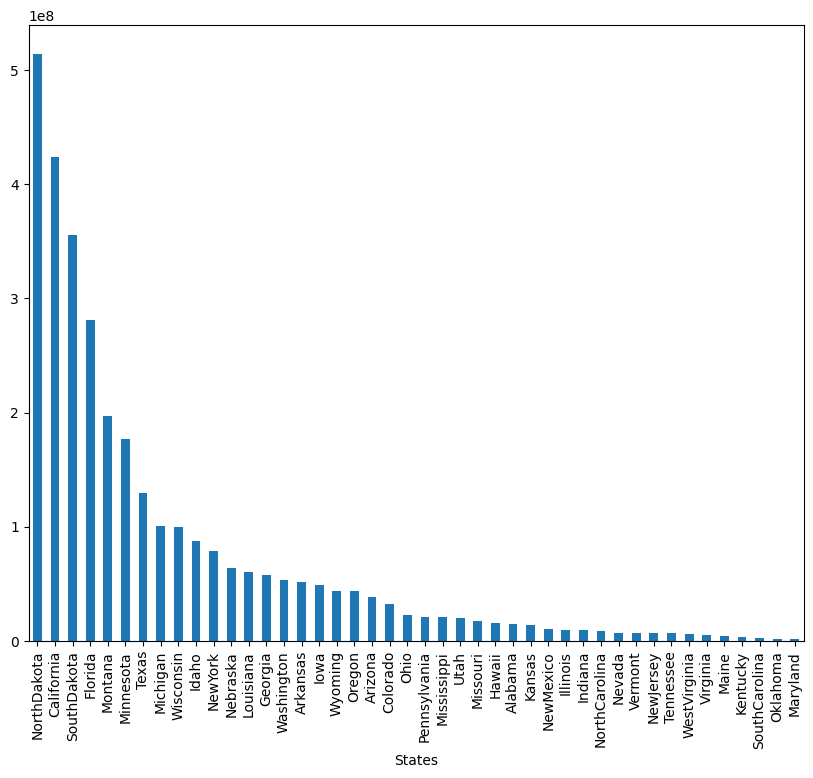

In [ ]:
plt.figure(figsize = (10, 8))
df.groupby("state")["production"].sum().sort_values(ascending = False).plot(kind = "bar")
plt.xlabel("States")
plt.show()

**NorthDakota is the one leading, and MaryLand is the one having least production**

<hr>

**Analysing the trend in the data**

In [ ]:
trend_data = df.drop("state", axis = 1).groupby("year").mean()

In [ ]:
trend_data.head()

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
year,,,,,,
1995,59977.272727,66.909091,4.778909e+06,9.575000e+05,74.840909,3.121000e+06
1996,58181.818182,70.068182,4.499886e+06,1.066455e+06,99.568182,4.085773e+06
1997,59651.162791,68.953488,4.445953e+06,1.601256e+06,91.325581,3.386000e+06
1998,60883.720930,69.953488,5.100488e+06,1.871488e+06,83.720930,3.395302e+06
1999,62186.046512,65.465116,4.757791e+06,1.839698e+06,80.325581,2.888070e+06


Trend on Colony